# Analise de Teste A/B - Sistema de Recomendacoes


Este projeto analisa um teste A/B conduzido por uma loja virtual com o objetivo de avaliar o impacto de um novo sistema de recomendacoes nas taxas de conversao dos usuarios. A analise inclui diagnostico dos dados, exploracao do funil de compra e aplicacao de testes estatisticos para apoiar a tomada de decisao.



## Índice

- [Decomposição](#decomposicao)
- [Diagnóstico e Preparação dos Dados](#diagnostico-e-preparacao-dos-dados)
- [Análise Exploratória dos Dados (EDA)](#analise-exploratoria-dos-dados-eda)
- [Análise do Funil de Conversão](#analise-do-funil-de-conversao)
- [Teste A/B](#teste-ab)
- [Conclusões e Recomendações](#conclusoes-e-recomendacoes)




## Decomposição
 # Objetivo do experimento

Avaliar se a implementação de um sistema aprimorado de recomendações aumenta as taxas de conversão dos usuários ao longo do funil de compra — desde a visualização da página do produto até a finalização da compra — com um crescimento mínimo esperado de 10% em cada etapa.
Nome do teste: recommender_system_test
Data de início: 07/12/2020
Data de encerramento de novos usuários: 21/12/2020
Data de término: 01/01/2021

 ## Hipótese de negócio

Se um sistema de recomendações mais eficiente for implementado, os usuários terão maior probabilidade de interagir com os produtos e avançar no funil de compra, resultando em um aumento nas taxas de conversão.

## Hipóteses estatísticas:
Antes de aplicar testes estatísticos, é fundamental garantir a qualidade e a confiabilidade dos dados por meio de uma análise exploratória. Dados inconsistentes ou viesados podem levar a interpretações incorretas e comprometer a validade dos resultados do experimento.

### H0 (hipótese nula):
Não há diferença estatisticamente significativa nas taxas de conversão entre os grupos controle e teste.

### H1 (hipótese alternativa):
Os usuários expostos ao novo sistema de recomendações apresentam taxas de conversão superiores às do grupo controle.

## Limitações do experimento

O teste foi conduzido durante o mês de dezembro, período associado à sazonalidade das compras de Natal, o que pode influenciar o comportamento dos usuários.

É necessário verificar se a duração do experimento foi suficiente para gerar resultados confiáveis.

Deve-se garantir a independência dos grupos, evitando a presença de usuários em ambas as variações.

Campanhas de marketing simultâneas podem atuar como fator de confusão e impactar as conversões.

## Diagnóstico inicial dos dados

Antes da análise, será realizada uma verificação da qualidade dos dados, incluindo:

identificação de valores ausentes;

verificação dos tipos e formatos das variáveis (especialmente datas);

busca por registros duplicados;

validação da consistência dos eventos;

confirmação do equilíbrio e da comparabilidade entre os grupos.

Análise planejada

## A análise será conduzida nas seguintes etapas:
*Exploração dos dados (EDA).

*Construção do funil de conversão para cada grupo.

*Cálculo das taxas de conversão em cada etapa.

*Aplicação de testes estatísticos (teste Z) para comparar as proporções.

*Interpretação dos resultados e elaboração de recomendações de negócio.

## Importar Bibliotecas

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
import pandas as pd

df = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df.to_csv('final_ab_events_upd_us.csv')



In [89]:
# baixar datasets
PATH = 'datasets/'

marketing = pd.read_csv(PATH + 'ab_project_marketing_events_us.csv')
new_users = pd.read_csv(PATH + 'final_ab_new_users_upd_us.csv')
events = pd.read_csv(PATH + 'final_ab_events_upd_us.csv')
participants = pd.read_csv(PATH + 'final_ab_participants_upd_us.csv')

## Diagnóstico e Preparação dos Dados

## Limpeza dados dataset marketing

In [90]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [91]:
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])
marketing.info()
(marketing['start_dt'] > marketing['finish_dt']).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


0

In [92]:
marketing.duplicated().sum()

0

As colunas de data foram convertidas para o formato datetime. 
Não há duplicados


## Limpeza dataset new_users

In [93]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [94]:
#converter para datatime
new_users['first_date'] = pd.to_datetime(new_users['first_date'])


In [95]:
#confirmar se tem user_id duplicado
new_users['user_id'].duplicated().sum()

0

In [96]:
#verificar intervalo de datas - usuários entre 07/12/2020 e 23/12/2020
new_users['first_date'].min(), new_users['first_date'].max()


(Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-23 00:00:00'))

In [97]:
#verificar tráfego
new_users['device'].value_counts()


Android    26159
PC         14845
iPhone     11902
Mac         5797
Name: device, dtype: int64

As colunas data foram convertidas para datatime. Não há valores ausentes e nemduplicados.As datas de cadastro estão dentro do período esperado.Não há desequilibrios extremos na distribuição dos dispositivos.

## Limpesa de dados events

In [98]:
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  423761 non-null  int64  
 1   user_id     423761 non-null  object 
 2   event_dt    423761 non-null  object 
 3   event_name  423761 non-null  object 
 4   details     60314 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 16.2+ MB


,Unnamed: 0,user_id,event_dt,event_name,details
0,0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [99]:
#deletar coluna unnamed
events = events.drop(columns=['Unnamed: 0'])


In [100]:
#data para datatime
events['event_dt'] = pd.to_datetime(events['event_dt'])

In [101]:

print("\nDUPLICADOS:")
print(events.duplicated().sum())

print("\nUSUARIOS UNICOS:")
print(events['user_id'].nunique())

print("\nEVENTOS:")
display(events['event_name'].value_counts())

print("\nVALORES NULOS (%):")
display(events.isna().mean().sort_values(ascending=False) * 100)




DUPLICADOS:
0

USUARIOS UNICOS:
58703

EVENTOS:


login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64


VALORES NULOS (%):


details       85.766977
user_id        0.000000
event_dt       0.000000
event_name     0.000000
dtype: float64

O dataset apresentou boa qualidade estrutural, sem registros duplicados e com eventos consistentes entre os usuários. A presença de valores ausentes na coluna details mostrou-se coerente com a lógica dos dados, uma vez que essa informação está associada apenas aos eventos de compra.


## Limpeza dataset participants

In [102]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [103]:
#ver duplicados
participants['user_id'].duplicated().sum()


887

## Análise Exploratória dos Dados (EDA)

In [104]:
# quantos testes existem
participants['ab_test'].value_counts()


interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

O teste esperava 6000 usuários e só temos 3675.

In [105]:
#verificar se grupos estão equilibrados
test = participants.query("ab_test == 'recommender_system_test'")
test['group'].value_counts()


A    2747
B     928
Name: group, dtype: int64

Foram identificados 14.525 registros, indicando a presença de múltiplos testes sendo executados simultaneamente.

O experimento recommender_system_test possui 3.675 participantes, número inferior aos 6.000 usuários previstos, o que pode impactar a robustez dos resultados.

Observou-se um forte desequilíbrio entre os grupos, com predominância do grupo A em relação ao grupo B.

Também foram detectados 887 usuários duplicados, sugerindo a possibilidade de participação em mais de um experimento, o que pode comprometer a independência das amostras.

In [106]:
# quantos usuários estão em mais de um teste
participants.groupby('user_id')['ab_test'].nunique().value_counts()


1    12751
2      887
Name: ab_test, dtype: int64

In [107]:
# identificar usuários com mais de um teste
multi_test_users = participants.groupby('user_id')['ab_test'].nunique()
multi_test_users = multi_test_users[multi_test_users > 1].index

# remover
participants_clean = participants[~participants['user_id'].isin(multi_test_users)]
participants_clean.groupby('user_id')['ab_test'].nunique().value_counts()


1    12751
Name: ab_test, dtype: int64

In [108]:
#quantos usuários sobraram
participants_clean['ab_test'].value_counts()


interface_eu_test          9963
recommender_system_test    2788
Name: ab_test, dtype: int64

Foram identificados usuários participando de múltiplos experimentos simultaneamente. Para preservar a independência das amostras e garantir a validade do teste A/B, esses usuários foram removidos da análise.

In [109]:
# verificar qualidade do testa A/B
participants_clean.query(
    "ab_test == 'recommender_system_test'"
)['group'].value_counts()


A    2082
B     706
Name: group, dtype: int64

Após a remoção de usuários participantes de múltiplos experimentos, observou-se uma redução significativa no tamanho da amostra do teste. Esse fator pode limitar o poder estatístico da análise e deve ser considerado na interpretação dos resultados.

In [110]:
#preparar dados apenas com usuários do teste 
test_users = participants_clean.query(
    "ab_test == 'recommender_system_test'"
)['user_id'].unique()

events_test = events[events['user_id'].isin(test_users)].copy()

print(f"Número de usuários no teste: {len(test_users)}")
print(f"Número total de eventos gerados por esses usuários: {events_test.shape[0]}")
print(f"Número de colunas no dataset: {events_test.shape[1]}")


Número de usuários no teste: 2788
Número total de eventos gerados por esses usuários: 18194
Número de colunas no dataset: 4


In [111]:
events_test['event_dt'].min(), events_test['event_dt'].max()



(Timestamp('2020-12-07 00:16:00'), Timestamp('2020-12-30 06:42:52'))

Após filtrar os eventos para apenas os usuários participantes do experimento, o dataset foi reduzido para 18.194 registros. Essa etapa garante que a análise reflita exclusivamente o comportamento da amostra testada, evitando distorções causadas por usuários externos ao experimento.

Resumo: 

Durante a etapa de preparação, foi realizada uma auditoria dos datasets para garantir a validade do experimento.

Inicialmente, o arquivo de participantes continha dois testes:

interface_eu_test: 10.850 usuários

recommender_system_test: 3.675 usuários

Foram identificados 887 usuários participando de ambos os experimentos, caracterizando contaminação experimental. Após a remoção desses usuários, permaneceram 12.751 participantes únicos.

Focando no experimento recommender_system_test, observou-se que:

Antes da limpeza:

Grupo A: 2.747 usuários

Grupo B: 928 usuários

Após a remoção dos usuários contaminados:

Grupo A: 2.082 usuários

Grupo B: 706 usuários

O experimento previa aproximadamente 6.000 participantes, porém a amostra final contém 2.788 usuários, indicando um possível risco de baixo poder estatístico.

Além disso, foi identificado um desequilíbrio entre os grupos (≈75% no controle e 25% no teste), fator que pode impactar a precisão das estimativas.

Após a definição da amostra válida, os eventos foram filtrados para incluir apenas os usuários do experimento, reduzindo o dataset de 423.761 para 18.194 eventos.

A análise temporal mostrou que os eventos ocorreram entre:

07/12/2020 — início do experimento

30/12/2020 — ainda dentro da janela de observação

Observa-se, contudo, que usuários inscritos nas datas mais próximas ao encerramento do recrutamento podem não ter completado os 14 dias de acompanhamento, o que representa uma limitação potencial da análise.

## Análise do Funil de Conversão

In [112]:
# experimento
base = participants_clean.query(
    "ab_test == 'recommender_system_test'"
).groupby('group')['user_id'].nunique()

base

group
A    2082
B     706
Name: user_id, dtype: int64

In [113]:
#eventos
# Fazer merge com events_test

user_groups = participants_clean.query(
    "ab_test == 'recommender_system_test'"
)[['user_id', 'group']]

# Fazer merge correto
events_test = events_test.merge(
    user_groups, 
    on='user_id', 
    how='left'
)


page = events_test.query(
    "event_name == 'product_page'"
).groupby('group')['user_id'].nunique()

cart = events_test.query(
    "event_name == 'product_cart'"
).groupby('group')['user_id'].nunique()

purchase = events_test.query(
    "event_name == 'purchase'"
).groupby('group')['user_id'].nunique()

funnel = pd.concat([base, page, cart, purchase], axis=1)
funnel.columns = ['base', 'product_page', 'product_cart', 'purchase']

funnel

funnel['page_rate'] = funnel['product_page'] / funnel['base'] * 100
funnel['cart_rate'] = funnel['product_cart'] / funnel['base'] * 100
funnel['purchase_rate'] = funnel['purchase'] / funnel['base'] * 100

funnel.round(2)


,base,product_page,product_cart,purchase,page_rate,cart_rate,purchase_rate
group,,,,,,,
A,2082,1360,631,652,65.32,30.31,31.32
B,706,397,195,198,56.23,27.62,28.05


<AxesSubplot:>

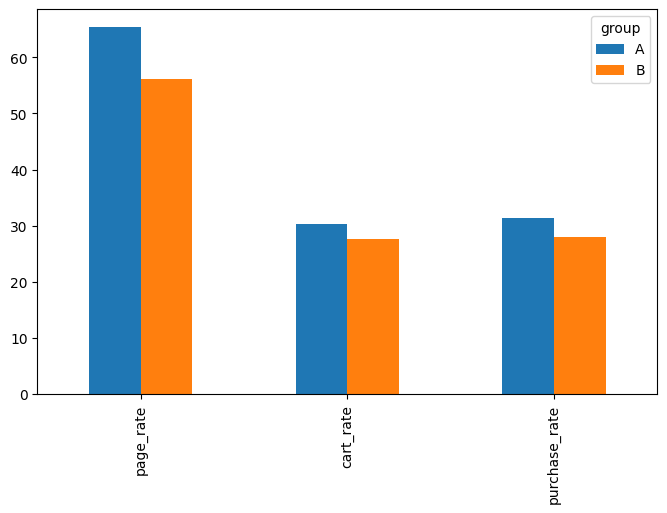

In [114]:
funnel[['page_rate','cart_rate','purchase_rate']].T.plot(
    kind='bar',
    figsize=(8,5)
)

Grupo B está pior em todas as etapas (page, cart, purchase).

O maior gap aparece no topo: product_page_rate

A: 65.32%

B: 56.23%

Diferença ~ -9,1 p.p.

Em compras, a diferença é menor:

A: 31.32%

B: 28.05%

Diferença ~ -3,27 p.p.

## Teste A/B


In [115]:
from statsmodels.stats.proportion import proportions_ztest

def ztest_stage(success_B, total_B, success_A, total_A, stage_name):
    stat, p = proportions_ztest(
        count=[success_B, success_A],
        nobs=[total_B, total_A],
        alternative='larger'
    )
    print(f"\n TESTE Z — {stage_name} (B > A)")
    print(f"Z = {stat:.4f} | p-value = {p:.6f}")
    if p < 0.05:
        print(" Evidência de que B > A")
    else:
        print(" Sem evidência de que B > A")

ztest_stage(397, 706, 1360, 2082, "Product Page")
ztest_stage(195, 706, 631, 2082, "Product Cart")
ztest_stage(198, 706, 652, 2082, "Purchase")



 TESTE Z — Product Page (B > A)
Z = -4.3233 | p-value = 0.999992
 Sem evidência de que B > A

 TESTE Z — Product Cart (B > A)
Z = -1.3512 | p-value = 0.911683
 Sem evidência de que B > A

 TESTE Z — Purchase (B > A)
Z = -1.6313 | p-value = 0.948591
 Sem evidência de que B > A


## Conclusões e Recomendações

Para avaliar se o novo sistema de recomendações (grupo B) melhora as métricas do funil em relação ao controle (grupo A), aplicou-se um teste Z de proporções unicaudal (hipótese direcional B > A), conforme o objetivo original do experimento.

Resultados:

Product Page: Z = -4.3233, p-value = 0.999992

Product Cart: Z = -1.3512, p-value = 0.911683

Purchase: Z = -1.6313, p-value = 0.948591

Em todas as etapas, não foi possível rejeitar H0 (B ≤ A), ou seja, não há evidência estatística de que o grupo B seja superior ao grupo A. Além disso, as estatísticas Z negativas indicam que, no período observado, o desempenho do grupo B foi inferior ao do grupo A nas três métricas analisadas.


Portanto, os resultados não sustentam a expectativa de aumento mínimo de 10% em cada etapa do funil para o grupo B.

## Conclusões e Recomendações

Com base nos resultados obtidos, não se recomenda o lançamento imediato do novo sistema de recomendações, uma vez que não foram observadas melhorias estatisticamente significativas nas métricas analisadas e há indícios de desempenho inferior em relação ao grupo de controle. Recomenda-se a realização de investigações adicionais antes de uma nova tentativa de implementação.

